## Logistic Regression with Dataset "Salary"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
sal = pd.read_csv('salary.csv')
sal.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1032 non-null   int64 
 1   age             1032 non-null   int64 
 2   Workclass       1032 non-null   object
 3   fnlwgt          1032 non-null   int64 
 4   education       1032 non-null   object
 5   education-num   1032 non-null   int64 
 6   marital-status  1032 non-null   object
 7   occupation      1032 non-null   object
 8   relationship    1032 non-null   object
 9   race            1032 non-null   object
 10  sex             1032 non-null   object
 11  capital-gain    1032 non-null   int64 
 12  capital-loss    1032 non-null   int64 
 13  hours-per-week  1032 non-null   int64 
 14  native-country  1032 non-null   object
 15  Income          1032 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 129.1+ KB


In [4]:
sal.drop('Unnamed: 0',axis = 1,inplace = True)

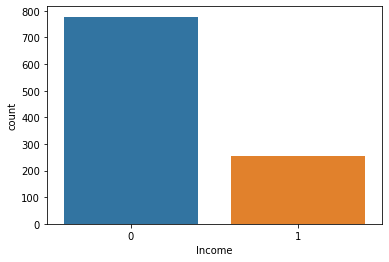

In [5]:
plt.figure()
sns.countplot(data=sal,x = 'Income')
plt.show()

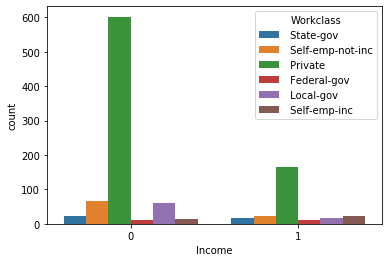

In [6]:
plt.figure()
sns.countplot(data=sal,x = 'Income',hue = 'Workclass')
plt.show()

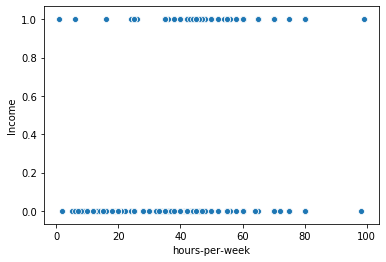

In [7]:
plt.figure()
sns.scatterplot(data=sal,x = 'hours-per-week',y = 'Income')
plt.show()

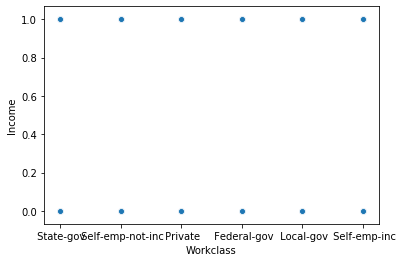

In [8]:
plt.figure()
sns.scatterplot(data=sal,x = 'Workclass',y = 'Income')
plt.show()

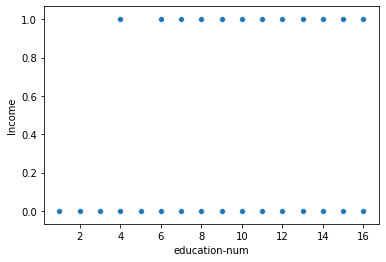

In [9]:
plt.figure()
sns.scatterplot(data = sal, x = 'education-num',y = 'Income')
plt.show()


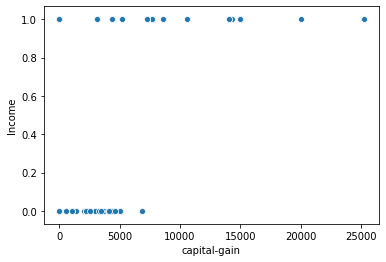

In [10]:
plt.figure()
sns.scatterplot(data = sal, x = 'capital-gain',y = 'Income')
plt.show()


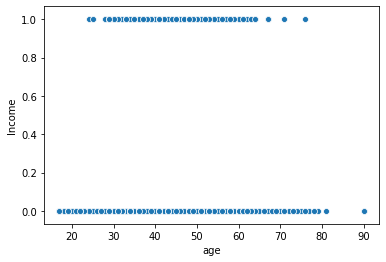

In [11]:
plt.figure()
sns.scatterplot(data = sal, x = 'age',y = 'Income')
plt.show()

In [12]:
sal_2 = sal[["age","education-num","capital-gain","hours-per-week"]]

In [13]:
sal_2.head(10)

,age,education-num,capital-gain,hours-per-week,Income
0,39,13,2174,40,0
1,50,13,0,13,0
2,38,9,0,40,0
3,53,7,0,40,0
4,28,13,0,40,0
5,37,14,0,40,0
6,49,5,0,16,0
7,52,9,0,45,1
8,31,14,14084,50,1
9,42,13,5178,40,1


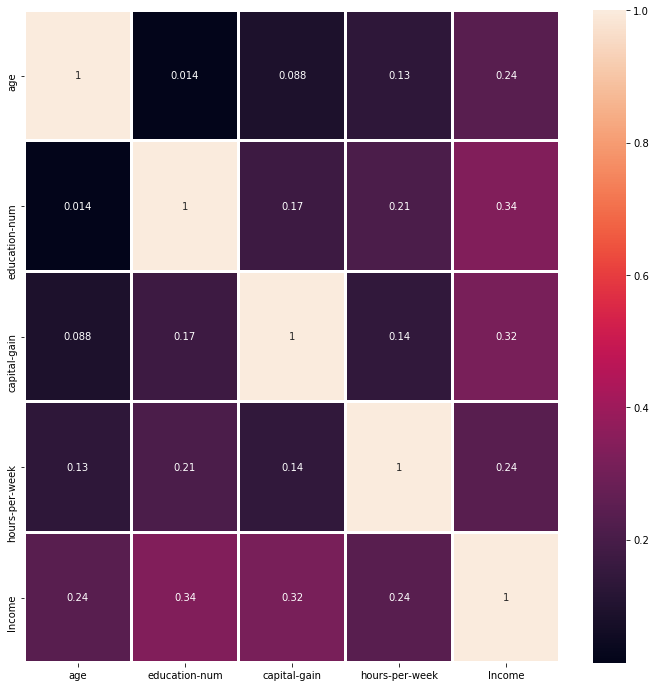

In [14]:
plt.figure(figsize = (12,12))
sns.heatmap( data = sal_2.corr(), annot = True,linewidths = 2)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit_transform(sal["Workclass"])

array([5, 4, 2, ..., 2, 1, 2])

In [17]:
sal_2["Workclass_enc"] = le.fit_transform(sal["Workclass"])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
le.fit_transform(sal["education"])
sal_2["education_enc"] = le.fit_transform(sal["education"])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
le.fit_transform(sal["marital-status"])
sal_2["marital-status_enc"] = le.fit_transform(sal["marital-status"])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
le.fit_transform(sal["occupation"])
sal_2["occupation_enc"] = le.fit_transform(sal["occupation"])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
le.fit_transform(sal["native-country"])
sal_2["native-country_enc"] = le.fit_transform(sal["native-country"])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
sal_2

,age,education-num,capital-gain,hours-per-week,Income,Workclass_enc,education_enc,marital-status_enc,occupation_enc,native-country_enc
0,39,13,2174,40,0,5,9,4,0,28
1,50,13,0,13,0,4,9,2,3,28
2,38,9,0,40,0,2,11,0,5,28
3,53,7,0,40,0,2,1,2,5,28
4,28,13,0,40,0,2,9,2,9,4
...,...,...,...,...,...,...,...,...,...,...
1027,34,9,0,40,0,2,11,0,5,28
1028,36,10,0,40,0,2,15,2,2,28
1029,41,9,0,50,0,2,11,2,13,28
1030,58,13,0,40,1,1,9,2,9,28


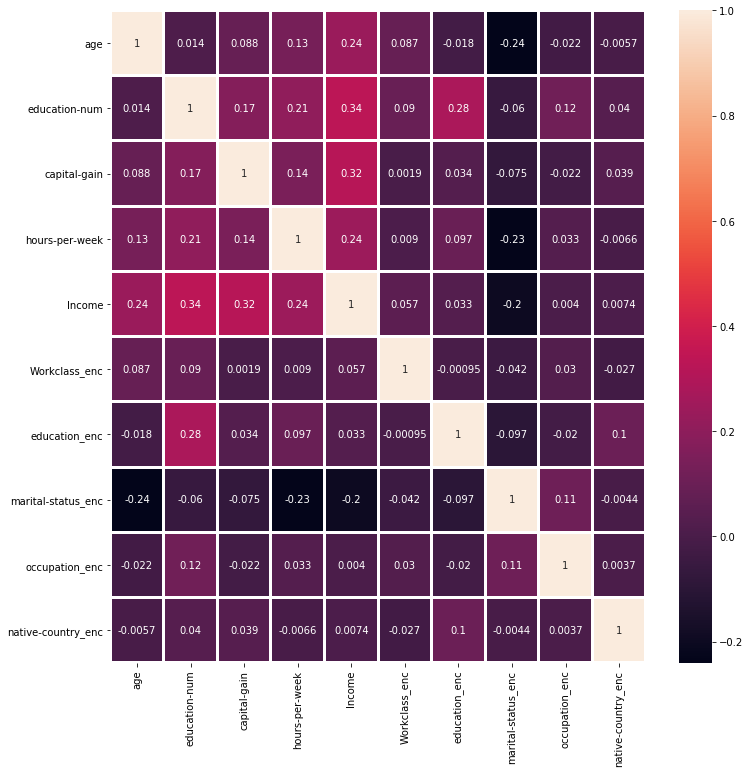

In [23]:
plt.figure(figsize = (12,12))
sns.heatmap( data = sal_2.corr(), annot = True,linewidths = 2)
plt.show()

In [24]:
X = sal_2.drop("Income",axis = 1)

In [25]:
y =sal_2["Income"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()

In [29]:
log.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [31]:
log.predict_proba(X_test)

array([[8.27924617e-01, 1.72075383e-01],
       [7.93689098e-01, 2.06310902e-01],
       [6.49799469e-01, 3.50200531e-01],
       [8.17814064e-01, 1.82185936e-01],
       [9.32145326e-01, 6.78546742e-02],
       [9.40952578e-01, 5.90474218e-02],
       [8.56259820e-01, 1.43740180e-01],
       [8.06696170e-01, 1.93303830e-01],
       [7.80863908e-01, 2.19136092e-01],
       [7.61786607e-01, 2.38213393e-01],
       [9.27982617e-01, 7.20173834e-02],
       [7.59586405e-01, 2.40413595e-01],
       [8.44823161e-01, 1.55176839e-01],
       [5.35794187e-01, 4.64205813e-01],
       [7.60679363e-01, 2.39320637e-01],
       [9.34365215e-01, 6.56347850e-02],
       [8.49128689e-01, 1.50871311e-01],
       [7.28883908e-01, 2.71116092e-01],
       [8.22470775e-01, 1.77529225e-01],
       [8.54519135e-01, 1.45480865e-01],
       [8.26397897e-01, 1.73602103e-01],
       [7.49561452e-01, 2.50438548e-01],
       [6.46781331e-01, 3.53218669e-01],
       [6.86211665e-01, 3.13788335e-01],
       [7.502389

In [32]:
log.score(X_train,y_train)

0.7728531855955678

In [33]:
log.score(X_test,y_test)

0.7935483870967742

In [34]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [35]:
accuracy_score(y_test,y_pred)

0.7935483870967742

In [36]:
precision_score(y_test, y_pred)

0.6333333333333333

In [37]:
recall_score(y_test,y_pred)

0.2638888888888889

In [38]:
f1_score(y_test,y_pred)

0.37254901960784315

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       238
           1       0.63      0.26      0.37        72

    accuracy                           0.79       310
   macro avg       0.72      0.61      0.62       310
weighted avg       0.77      0.79      0.76       310



In [41]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [42]:
print(tp, fp)
print(fn, tn)

19 11
53 227


In [43]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
accuracy

0.7935483870967742